In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import scipy.stats as stats
import numpy as np

In [95]:
df = pd.read_csv("MUP_DPR_RY22_P04_V10_DY20_NPI.csv", encoding = "ISO-8859-1")
pd.set_option("display.max_columns", None)
df

,PRSCRBR_NPI,Prscrbr_Last_Org_Name,Prscrbr_First_Name,Prscrbr_MI,Prscrbr_Crdntls,Prscrbr_Gndr,Prscrbr_Ent_Cd,Prscrbr_St1,Prscrbr_St2,Prscrbr_City,Prscrbr_State_Abrvtn,Prscrbr_State_FIPS,Prscrbr_zip5,Prscrbr_RUCA,Prscrbr_RUCA_Desc,Prscrbr_Cntry,Prscrbr_Type,Prscrbr_Type_src,Tot_Clms,Tot_30day_Fills,Tot_Drug_Cst,Tot_Day_Suply,Tot_Benes,GE65_Sprsn_Flag,GE65_Tot_Clms,GE65_Tot_30day_Fills,GE65_Tot_Drug_Cst,GE65_Tot_Day_Suply,GE65_Bene_Sprsn_Flag,GE65_Tot_Benes,Brnd_Sprsn_Flag,Brnd_Tot_Clms,Brnd_Tot_Drug_Cst,Gnrc_Sprsn_Flag,Gnrc_Tot_Clms,Gnrc_Tot_Drug_Cst,Othr_Sprsn_Flag,Othr_Tot_Clms,Othr_Tot_Drug_Cst,MAPD_Sprsn_Flag,MAPD_Tot_Clms,MAPD_Tot_Drug_Cst,PDP_Sprsn_Flag,PDP_Tot_Clms,PDP_Tot_Drug_Cst,LIS_Sprsn_Flag,LIS_Tot_Clms,LIS_Drug_Cst,NonLIS_Sprsn_Flag,NonLIS_Tot_Clms,NonLIS_Drug_Cst,Opioid_Tot_Clms,Opioid_Tot_Drug_Cst,Opioid_Tot_Suply,Opioid_Tot_Benes,Opioid_Prscrbr_Rate,Opioid_LA_Tot_Clms,Opioid_LA_Tot_Drug_Cst,Opioid_LA_Tot_Suply,Opioid_LA_Tot_Benes,Opioid_LA_Prscrbr_Rate,Antbtc_Tot_Clms,Antbtc_Tot_Drug_Cst,Antbtc_Tot_Benes,Antpsyct_GE65_Sprsn_Flag,Antpsyct_GE65_Tot_Clms,Antpsyct_GE65_Tot_Drug_Cst,Antpsyct_GE65_Bene_Suprsn_Flag,Antpsyct_GE65_Tot_Benes,Bene_Avg_Age,Bene_Age_LT_65_Cnt,Bene_Age_65_74_Cnt,Bene_Age_75_84_Cnt,Bene_Age_GT_84_Cnt,Bene_Feml_Cnt,Bene_Male_Cnt,Bene_Race_Wht_Cnt,Bene_Race_Black_Cnt,Bene_Race_Api_Cnt,Bene_Race_Hspnc_Cnt,Bene_Race_Natind_Cnt,Bene_Race_Othr_Cnt,Bene_Dual_Cnt,Bene_Ndual_Cnt,Bene_Avg_Risk_Scre
0,1003000126,Enkeshafi,Ardalan,NaN,M.D.,M,I,6410 Rockledge Dr Ste 304,NaN,Bethesda,MD,24.0,20817.0,1.0,Metropolitan area core: primary flow within an...,US,Internal Medicine,S,324,369.800000,20606.08,8621,106.0,NaN,277.0,308.233333,17117.40,7200.0,NaN,90.0,NaN,46.0,17370.69,NaN,278.0,3235.39,NaN,0.0,0.0,NaN,132.0,7561.77,NaN,192.0,13044.31,NaN,118.0,6219.38,NaN,206.0,14386.70,11.0,72.70,59.0,NaN,3.395062,0.0,0.00,0.0,NaN,0.000000,42.0,4868.85,38.0,NaN,0.0,0.0,NaN,0.0,73.160377,16.0,42.0,32.0,16.0,57.0,49.0,67.0,27.0,NaN,NaN,0.0,NaN,28.0,78.0,2.245800
1,1003000142,Khalil,Rashid,NaN,M.D.,M,I,4126 N Holland Sylvania Rd,Suite 220,Toledo,OH,39.0,43623.0,1.0,Metropolitan area core: primary flow within an...,US,Anesthesiology,S,1992,2145.666667,79803.65,60953,228.0,NaN,727.0,805.066667,18262.43,22408.0,NaN,126.0,NaN,77.0,31604.85,NaN,1915.0,48198.80,NaN,0.0,0.0,NaN,1207.0,46084.41,NaN,785.0,33719.24,NaN,1296.0,58830.74,NaN,696.0,20972.91,904.0,38533.11,25419.0,145.0,45.381526,153.0,23115.25,4464.0,22.0,16.924779,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,64.315789,102.0,82.0,32.0,12.0,146.0,82.0,130.0,81.0,NaN,12.0,0.0,NaN,125.0,103.0,1.695165
2,1003000167,Escobar,Julio,E,DDS,M,I,5 Pine Cone Rd,NaN,Dayton,NV,32.0,89403.0,2.0,Metropolitan area high commuting: primary flow...,US,Dentist,S,57,57.700000,327.34,554,43.0,#,NaN,NaN,NaN,NaN,#,NaN,#,NaN,NaN,NaN,47.0,271.28,*,NaN,NaN,*,NaN,NaN,#,NaN,NaN,*,NaN,NaN,#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0,262.79,40.0,*,NaN,NaN,NaN,NaN,73.139535,NaN,NaN,NaN,NaN,20.0,23.0,41.0,0.0,0.0,NaN,0.0,NaN,0.0,43.0,1.006070
3,1003000175,Reyes-Vasquez,Belinda,NaN,D.D.S.,F,I,322 N Azusa Ave Ste 202,NaN,La Puente,CA,6.0,91744.0,1.0,Metropolitan area core: primary flow within an...,US,Dentist,S,18,18.000000,128.52,181,NaN,#,NaN,NaN,NaN,NaN,*,NaN,*,NaN,NaN,NaN,16.0,111.22,#,NaN,NaN,#,NaN,NaN,*,NaN,NaN,*,NaN,NaN,*,NaN,NaN,0.0,0.00,0.0,NaN,0.000000,0.0,0.00,0.0,NaN,NaN,16.0,116.30,NaN,*,NaN,NaN,NaN,NaN,71.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.251869
4,1003000282,Blakemore,Rosie,K,FNP,F,I,Tennessee Prison For Women,3881 Stewarts Lane,Nashville,TN,47.0,37243.0,1.0,Metropolitan area core: primary flow within an...,US,Nurse Practitioner,S,37,47.000000,3834.98,1366,NaN,#,NaN,NaN,NaN,NaN,*,NaN,*,NaN,NaN,NaN,27.0,491.18,#,NaN,NaN,NaN,23.0,3779.95,NaN,14.0,55.03,#,NaN,NaN,*,NaN,NaN,0.0,0.00,0.0,NaN,0.000000,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,*,NaN,NaN,NaN,NaN,67.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.919074
...,...,...,...,...,...,...,...,...,...,...

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255175 entries, 0 to 1255174
Data columns (total 85 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   PRSCRBR_NPI                     1255175 non-null  int64  
 1   Prscrbr_Last_Org_Name           1255175 non-null  object 
 2   Prscrbr_First_Name              1255124 non-null  object 
 3   Prscrbr_MI                      839049 non-null   object 
 4   Prscrbr_Crdntls                 1155833 non-null  object 
 5   Prscrbr_Gndr                    1255124 non-null  object 
 6   Prscrbr_Ent_Cd                  1255175 non-null  object 
 7   Prscrbr_St1                     1255174 non-null  object 
 8   Prscrbr_St2                     341872 non-null   object 
 9   Prscrbr_City                    1255174 non-null  object 
 10  Prscrbr_State_Abrvtn            1255175 non-null  object 
 11  Prscrbr_State_FIPS              1254045 non-null  float64
 12  

In [97]:
unique_counts = df['PRSCRBR_NPI'].nunique()

print(unique_counts)

1255175


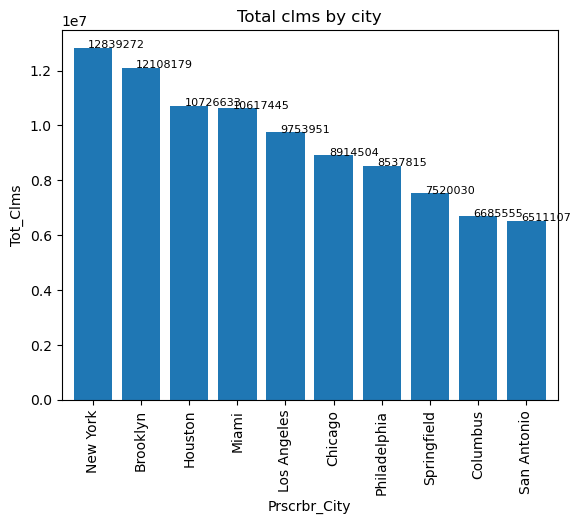

In [102]:
#df.groupby('Prscrbr_City')['Tot_Clms'].sum().plot(kind='bar', xlabel='Prscrbr_City', ylabel='Tot_Clms', title='Total clms by city')
grouped_df = df.groupby('Prscrbr_City')['Tot_Clms'].sum().nlargest(10)

# create a bar plot of the top 10 cities with enough space between the bars
ax = grouped_df.plot(kind='bar', xlabel='Prscrbr_City', ylabel='Tot_Clms', title='Total clms by city', width=0.8)

# add value labels to the bar chart
for i, v in enumerate(grouped_df):
    ax.text(i-0.1, v+20, str(v), color='black', fontsize=8)

plt.show()

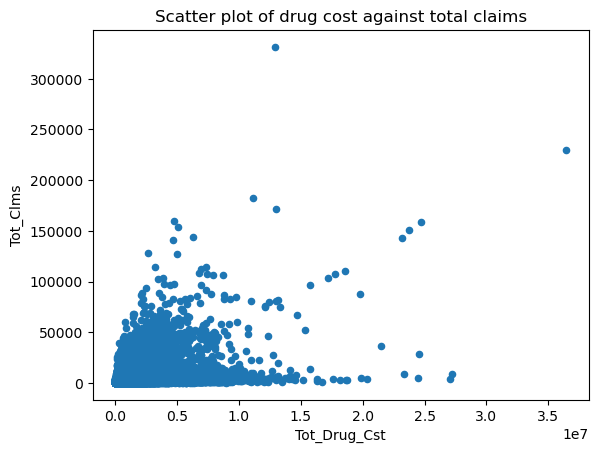

In [103]:
ax = df.plot.scatter(x='Tot_Drug_Cst', y='Tot_Clms', title='Scatter plot of drug cost against total claims')

plt.show()

In [41]:
col_lis=['Prscrbr_Gndr','Prscrbr_Ent_Cd','Prscrbr_RUCA','Prscrbr_Type','Prscrbr_Type_src','Tot_Clms','Tot_30day_Fills','Tot_Drug_Cst','Tot_Day_Suply','Tot_Benes','Bene_Avg_Age','Bene_Dual_Cnt','Bene_Ndual_Cnt']
df = df[col_lis]
df

,Prscrbr_Gndr,Prscrbr_Ent_Cd,Prscrbr_RUCA,Prscrbr_Type,Prscrbr_Type_src,Tot_Clms,Tot_30day_Fills,Tot_Drug_Cst,Tot_Day_Suply,Tot_Benes,Bene_Avg_Age,Bene_Dual_Cnt,Bene_Ndual_Cnt
0,M,I,1.0,Internal Medicine,S,324,369.800000,20606.08,8621,106.0,73.160377,28.0,78.0
1,M,I,1.0,Anesthesiology,S,1992,2145.666667,79803.65,60953,228.0,64.315789,125.0,103.0
2,M,I,2.0,Dentist,S,57,57.700000,327.34,554,43.0,73.139535,0.0,43.0
3,F,I,1.0,Dentist,S,18,18.000000,128.52,181,NaN,71.142857,NaN,NaN
4,F,I,1.0,Nurse Practitioner,S,37,47.000000,3834.98,1366,NaN,67.333333,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255170,F,I,1.0,Optometry,S,40,80.666667,9870.01,2357,17.0,77.235294,NaN,NaN
1255171,M,I,1.0,Dentist,S,72,73.200000,397.84,1092,27.0,73.703704,NaN,NaN
1255172,M,I,2.0,Nurse Practitioner,S,47,90.466667,13618.96,2704,21.0,64.190476,NaN,NaN
1255173,M,I,1.0,Otolaryngology,S,249,291.066667,10899.52,5801,126.0,72.507937,18.0,108.0


In [42]:
df.describe() 

,Prscrbr_RUCA,Tot_Clms,Tot_30day_Fills,Tot_Drug_Cst,Tot_Day_Suply,Tot_Benes,Bene_Avg_Age,Bene_Dual_Cnt,Bene_Ndual_Cnt
count,1.254045e+06,1.255175e+06,1.255175e+06,1.255175e+06,1.255175e+06,1.112210e+06,1.255175e+06,723004.000000,723004.000000
mean,1.615823e+00,1.192005e+03,2.097651e+03,1.581508e+05,5.889718e+04,1.580354e+02,6.989451e+01,61.627193,155.301243
std,3.519668e+00,2.874306e+03,4.950211e+03,4.588665e+05,1.403302e+05,3.852023e+02,6.669640e+00,98.232387,397.891520
min,1.000000e+00,1.100000e+01,1.100000e+01,0.000000e+00,1.100000e+01,1.100000e+01,1.000000e+00,0.000000,0.000000
25%,1.000000e+00,5.200000e+01,6.300000e+01,1.513955e+03,9.570000e+02,3.300000e+01,6.753105e+01,19.000000,37.000000
50%,1.000000e+00,1.840000e+02,2.321000e+02,1.047939e+04,4.752000e+03,8.200000e+01,7.108696e+01,37.000000,86.000000
75%,1.000000e+00,9.350000e+02,1.458500e+03,1.133802e+05,3.985250e+04,2.010000e+02,7.365556e+01,73.000000,204.000000
max,9.900000e+01,3.314360e+05,3.318512e+05,3.643402e+07,5.365733e+06,1.710840e+05,1.060000e+02,23990.000000,147094.000000


In [43]:
# Looping through each column of the dataframe and printing the unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")


Unique values in column 'Prscrbr_Gndr': ['M' 'F' nan]
Unique values in column 'Prscrbr_Ent_Cd': ['I' 'O']
Unique values in column 'Prscrbr_RUCA': [ 1.   2.   1.1  5.   4.   7.   7.2 10.   8.   4.1  6.  10.1  nan  2.1
 10.3  3.   7.1  8.1 99.   8.2 10.2  9.   5.1]
Unique values in column 'Prscrbr_Type': ['Internal Medicine' 'Anesthesiology' 'Dentist' 'Nurse Practitioner'
 'Obstetrics & Gynecology' 'General Surgery' 'Family Practice' 'Urology'
 'Cardiac Surgery' 'Pharmacist' 'Physician Assistant' 'Cardiology'
 'Pain Management' 'Physical Medicine and Rehabilitation'
 'Radiation Oncology' 'Infectious Disease' 'Orthopedic Surgery'
 'Endocrinology' 'Rheumatology' 'Neurology' 'Dermatology' 'Nephrology'
 'Preventive Medicine' 'Emergency Medicine' 'Ophthalmology'
 'Pulmonary Disease' 'Otolaryngology' 'General Practice'
 'Interventional Cardiology' 'Naturopath'
 'Plastic and Reconstructive Surgery' 'Psychiatry & Neurology'
 'Psychiatry' 'Gastroenterology' 'Diagnostic Radiology'
 'Geriatric Medi

In [44]:
df.isnull().sum()*100/len(df)

Prscrbr_Gndr         0.004063
Prscrbr_Ent_Cd       0.000000
Prscrbr_RUCA         0.090027
Prscrbr_Type         0.000398
Prscrbr_Type_src     0.000000
Tot_Clms             0.000000
Tot_30day_Fills      0.000000
Tot_Drug_Cst         0.000000
Tot_Day_Suply        0.000000
Tot_Benes           11.390045
Bene_Avg_Age         0.000000
Bene_Dual_Cnt       42.398152
Bene_Ndual_Cnt      42.398152
dtype: float64

In [45]:
def randomsampleimputation(df, variable):
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    #print( random_sample)
    random_sample.index=df[df[variable].isnull()].index
    #print(random_sample.index)
    df.loc[df[variable].isnull(),variable]=random_sample
    

In [46]:
error_cols=[]
for col in df.columns:
    if df[col].isnull().sum()*100/len(df) > 30:
        print(col, "has more than 30% missing values")
        # Call function here if necessary
        try:
            randomsampleimputation(df, col)
        except ValueError:
            error_cols.append(col)
            continue


Bene_Dual_Cnt has more than 30% missing values
Bene_Ndual_Cnt has more than 30% missing values


In [47]:
print("deleting columns that has more missing values than sample size",error_cols)
df.drop(columns=error_cols, inplace=True)

deleting columns that has more missing values than sample size []


C:\Users\Dedu\AppData\Local\Temp\ipykernel_16088\3017622717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=error_cols, inplace=True)


In [48]:
for col in df.columns:
    print(col,df[col].isnull().sum()*100/len(df))

Prscrbr_Gndr 0.004063178441253212
Prscrbr_Ent_Cd 0.0
Prscrbr_RUCA 0.0900272870316888
Prscrbr_Type 0.0003983508275738443
Prscrbr_Type_src 0.0
Tot_Clms 0.0
Tot_30day_Fills 0.0
Tot_Drug_Cst 0.0
Tot_Day_Suply 0.0
Tot_Benes 11.39004521281893
Bene_Avg_Age 0.0
Bene_Dual_Cnt 0.0
Bene_Ndual_Cnt 0.0


In [49]:
numerical_feature= [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 9
Discrete feature Count 1
Continuous feature Count 8
Categorical feature Count 4


In [50]:
print("Numerical features:",numerical_feature)
print("--------------------------------------")
print("discrete_features:",discrete_feature)
print("--------------------------------------")
print("continuous_features:",continuous_feature)
print("--------------------------------------")
print("categorical_features:",categorical_feature)

Numerical features: ['Prscrbr_RUCA', 'Tot_Clms', 'Tot_30day_Fills', 'Tot_Drug_Cst', 'Tot_Day_Suply', 'Tot_Benes', 'Bene_Avg_Age', 'Bene_Dual_Cnt', 'Bene_Ndual_Cnt']
--------------------------------------
discrete_features: ['Prscrbr_RUCA']
--------------------------------------
continuous_features: ['Tot_Clms', 'Tot_30day_Fills', 'Tot_Drug_Cst', 'Tot_Day_Suply', 'Tot_Benes', 'Bene_Avg_Age', 'Bene_Dual_Cnt', 'Bene_Ndual_Cnt']
--------------------------------------
categorical_features: ['Prscrbr_Gndr', 'Prscrbr_Ent_Cd', 'Prscrbr_Type', 'Prscrbr_Type_src']


In [51]:
for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())

C:\Users\Dedu\AppData\Local\Temp\ipykernel_16088\1611960658.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = df[feature].fillna(df[feature].median())


In [52]:
for feature in categorical_feature:
    mode=df[feature].value_counts().index[0]
    #print(mode)
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature].fillna(mode,inplace=True)

C:\Users\Dedu\AppData\Local\Temp\ipykernel_16088\1687206692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature].fillna(mode,inplace=True)
C:\Users\Dedu\AppData\Local\Temp\ipykernel_16088\1687206692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature].fillna(mode,inplace=True)


In [53]:
for feature in discrete_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].mean())

C:\Users\Dedu\AppData\Local\Temp\ipykernel_16088\1932256975.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = df[feature].fillna(df[feature].mean())


In [54]:
for col in df.columns:
    print(col,df[col].isnull().sum()*100/len(df))

Prscrbr_Gndr 0.0
Prscrbr_Ent_Cd 0.0
Prscrbr_RUCA 0.0
Prscrbr_Type 0.0
Prscrbr_Type_src 0.0
Tot_Clms 0.0
Tot_30day_Fills 0.0
Tot_Drug_Cst 0.0
Tot_Day_Suply 0.0
Tot_Benes 0.0
Bene_Avg_Age 0.0
Bene_Dual_Cnt 0.0
Bene_Ndual_Cnt 0.0


In [55]:
# df is your DataFrame
duplicates = df.duplicated()
num_duplicates = duplicates.sum()

if num_duplicates == 0:
    print("No duplicate records found.")
else:
    print(f"{num_duplicates} duplicate records found.")
    #print(df[duplicates])
    # Remove duplicate records from the DataFrame
    print("removing duplicates.....")
    df.drop_duplicates(inplace=True)

    # Check if any duplicates remain
    duplicates = df.duplicated()
    num_duplicates = duplicates.sum()
    print("duplicates removed")



No duplicate records found.


In [56]:
df

,Prscrbr_Gndr,Prscrbr_Ent_Cd,Prscrbr_RUCA,Prscrbr_Type,Prscrbr_Type_src,Tot_Clms,Tot_30day_Fills,Tot_Drug_Cst,Tot_Day_Suply,Tot_Benes,Bene_Avg_Age,Bene_Dual_Cnt,Bene_Ndual_Cnt
0,M,I,1.0,Internal Medicine,S,324,369.800000,20606.08,8621,106.0,73.160377,28.0,78.0
1,M,I,1.0,Anesthesiology,S,1992,2145.666667,79803.65,60953,228.0,64.315789,125.0,103.0
2,M,I,2.0,Dentist,S,57,57.700000,327.34,554,43.0,73.139535,0.0,43.0
3,F,I,1.0,Dentist,S,18,18.000000,128.52,181,82.0,71.142857,105.0,197.0
4,F,I,1.0,Nurse Practitioner,S,37,47.000000,3834.98,1366,82.0,67.333333,15.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255170,F,I,1.0,Optometry,S,40,80.666667,9870.01,2357,17.0,77.235294,17.0,30.0
1255171,M,I,1.0,Dentist,S,72,73.200000,397.84,1092,27.0,73.703704,12.0,208.0
1255172,M,I,2.0,Nurse Practitioner,S,47,90.466667,13618.96,2704,21.0,64.190476,42.0,185.0
1255173,M,I,1.0,Otolaryngology,S,249,291.066667,10899.52,5801,126.0,72.507937,18.0,108.0


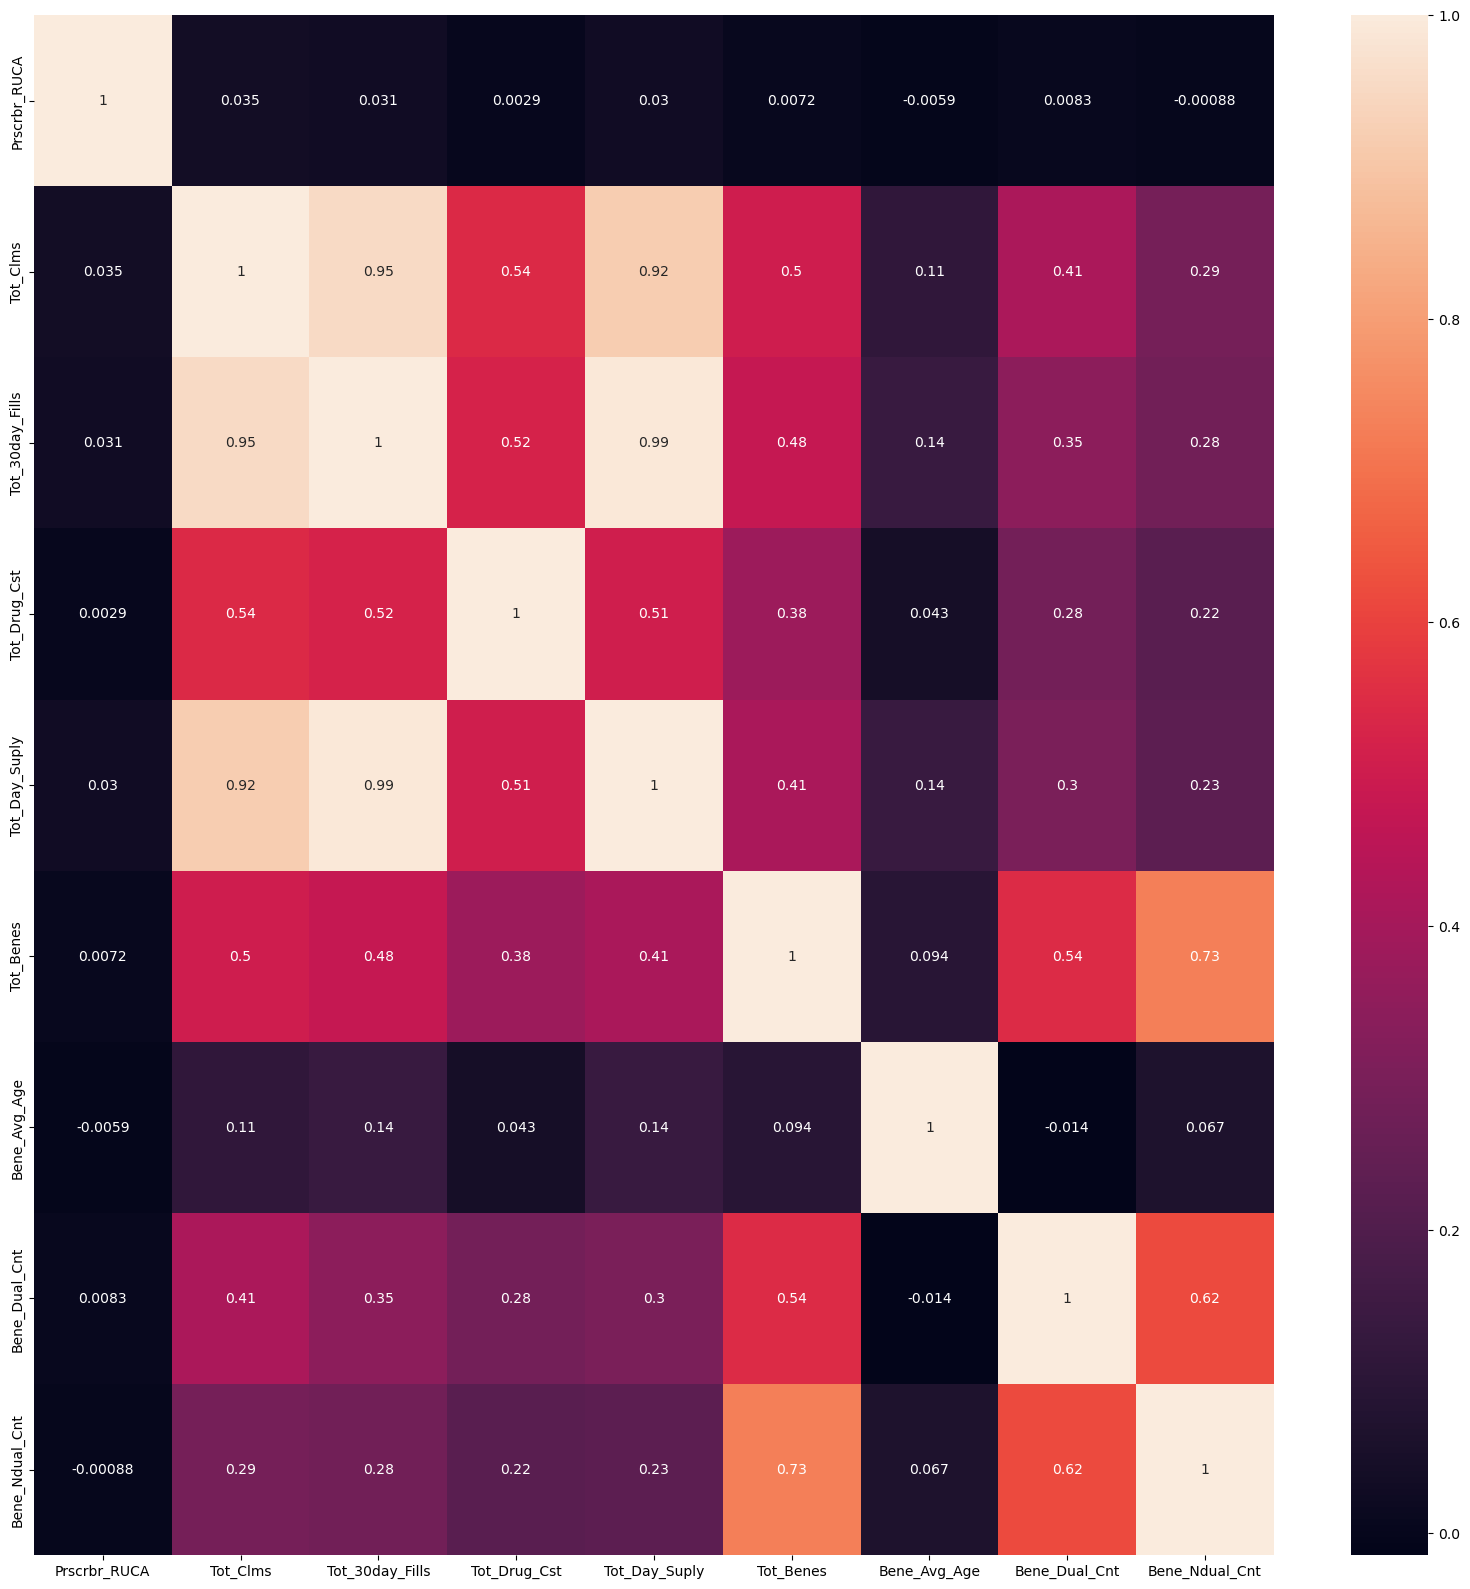

In [57]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

<function matplotlib.pyplot.show(close=None, block=None)>

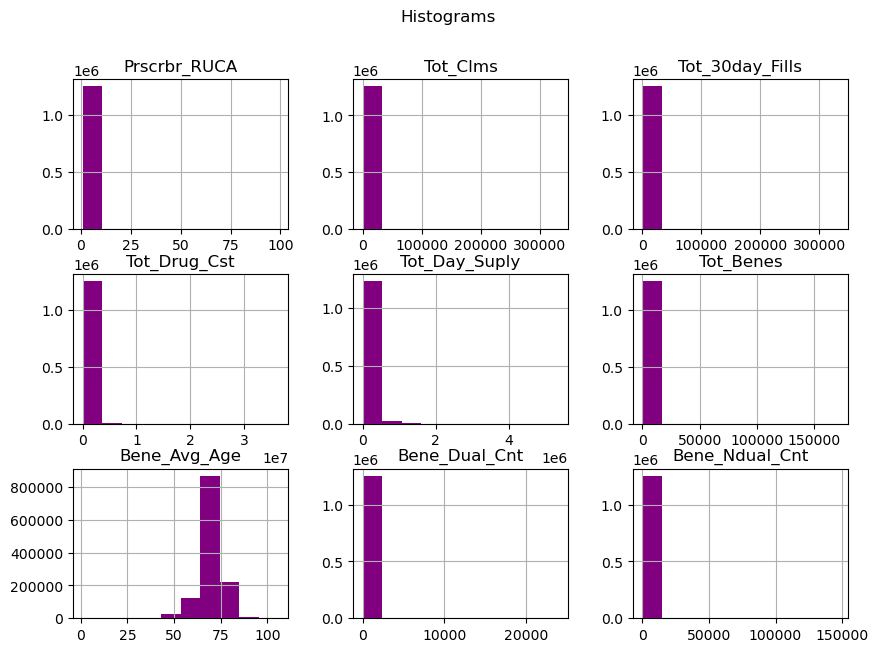

In [58]:
df.hist(figsize=(10,7), color ="purple") 
plt.suptitle("Histograms") 
plt.show

C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


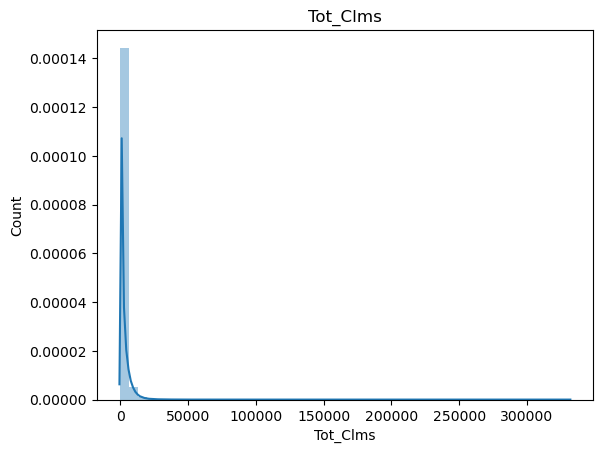

<Figure size 1500x1500 with 0 Axes>

C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


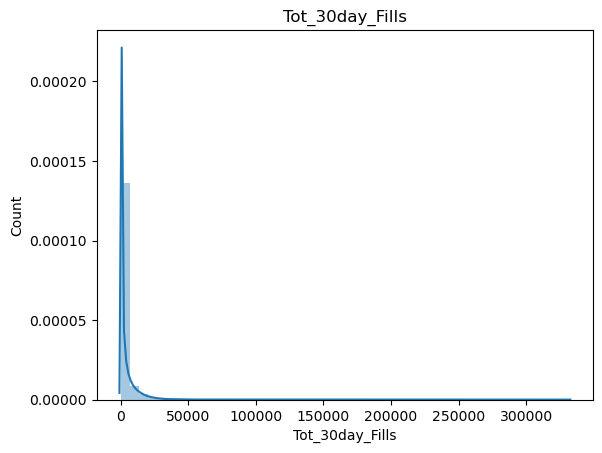

<Figure size 1500x1500 with 0 Axes>

C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


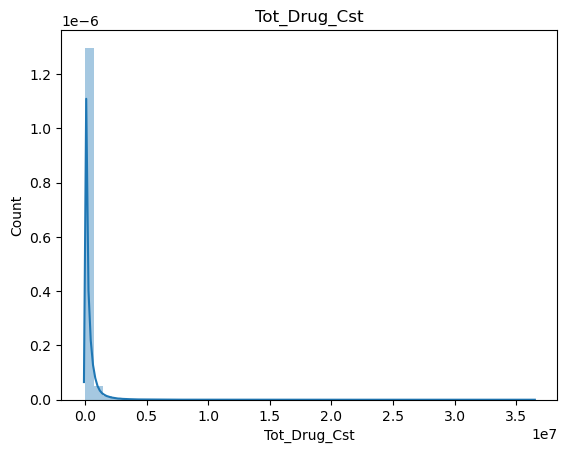

<Figure size 1500x1500 with 0 Axes>

C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


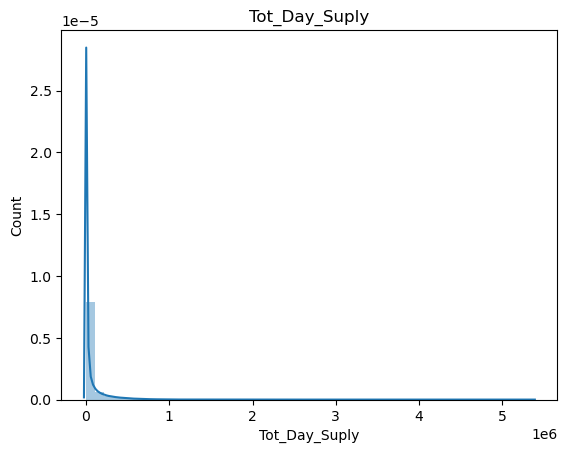

<Figure size 1500x1500 with 0 Axes>

C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


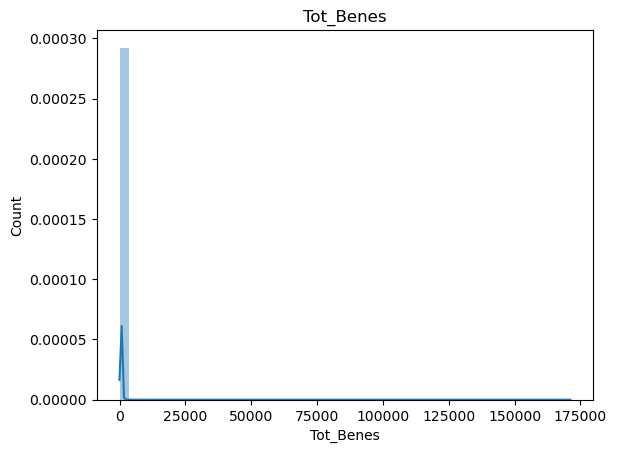

<Figure size 1500x1500 with 0 Axes>

C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


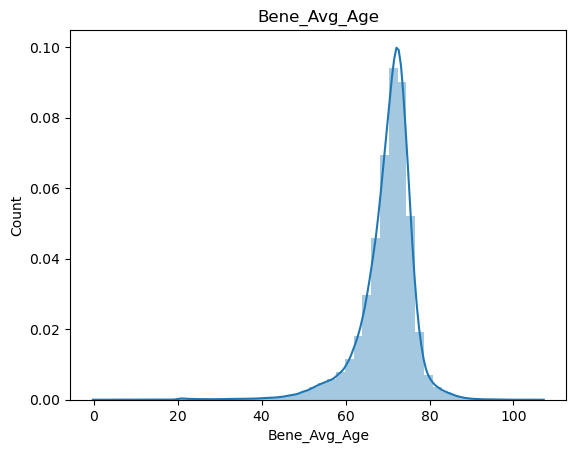

<Figure size 1500x1500 with 0 Axes>

C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


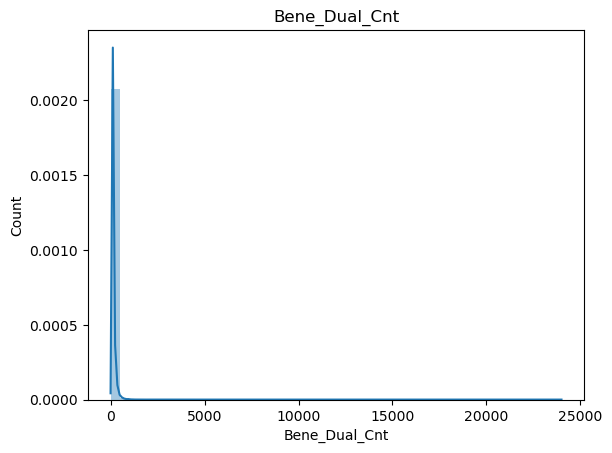

<Figure size 1500x1500 with 0 Axes>

C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


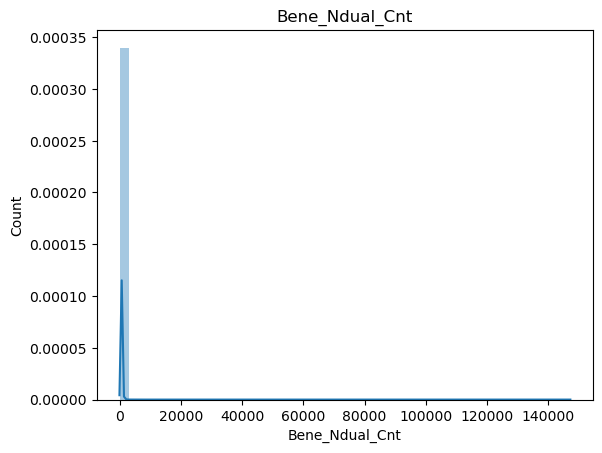

<Figure size 1500x1500 with 0 Axes>

In [59]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


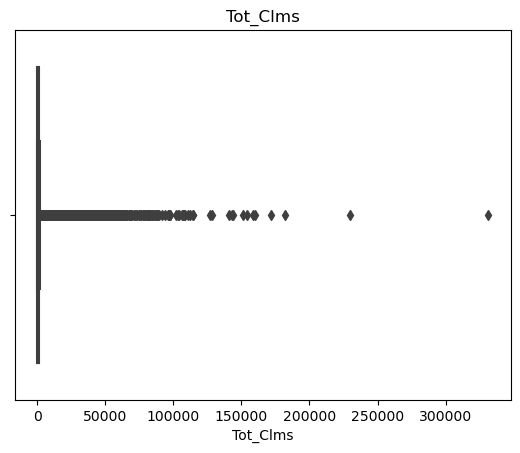

<Figure size 1500x1500 with 0 Axes>

In [60]:
#features = ['Tot_30day_Fills','Tot_Drug_Cst','Tot_Day_Suply',]
features=['Tot_Clms']
for feature in features:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

Tot_Clms


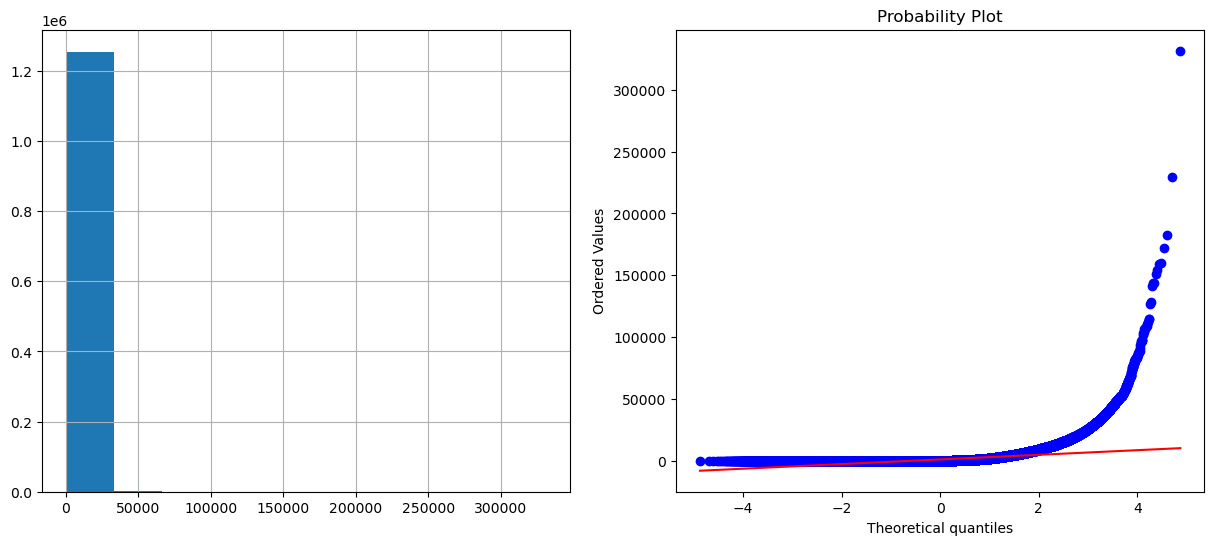

Tot_30day_Fills


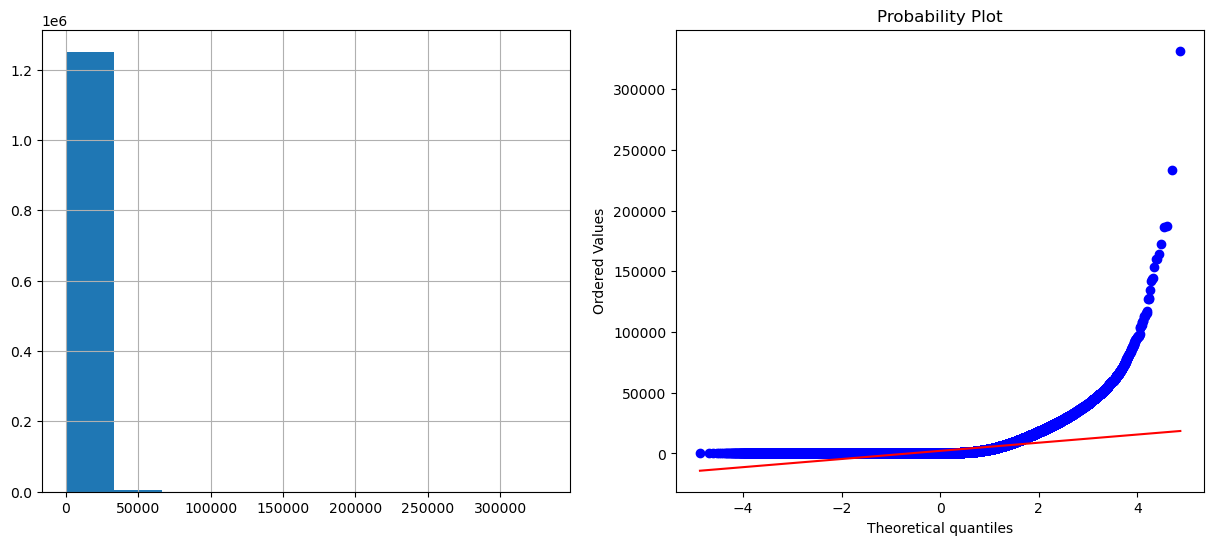

Tot_Drug_Cst


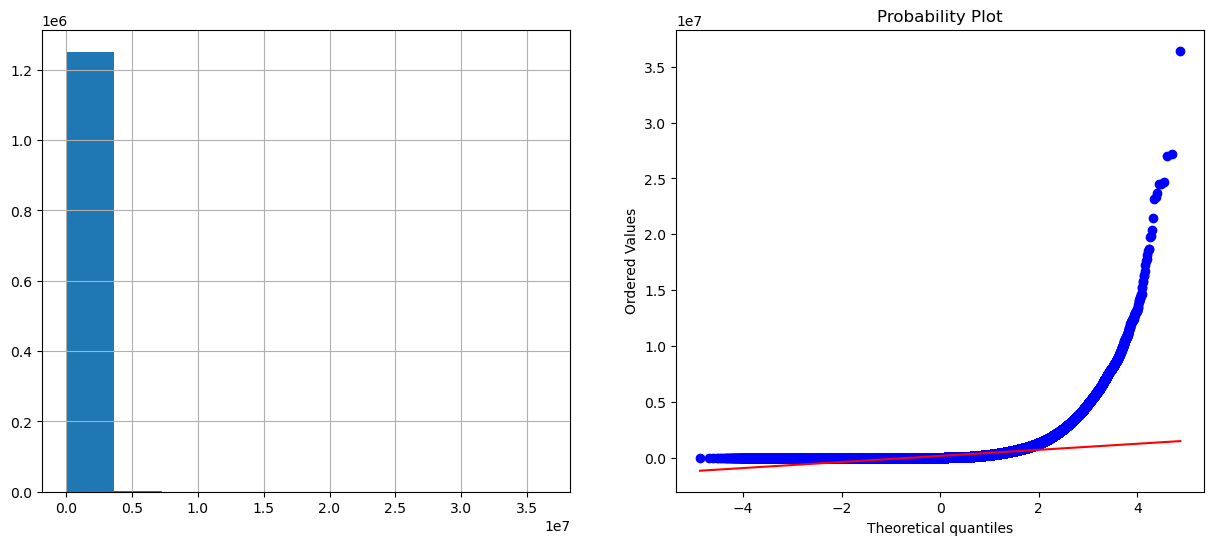

Tot_Day_Suply


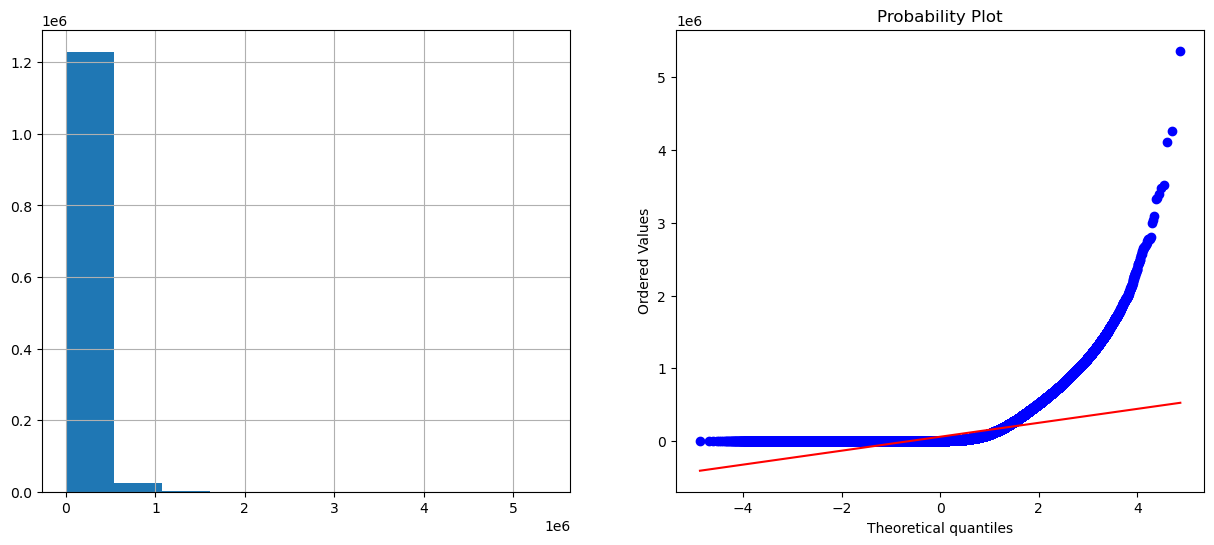

Tot_Benes


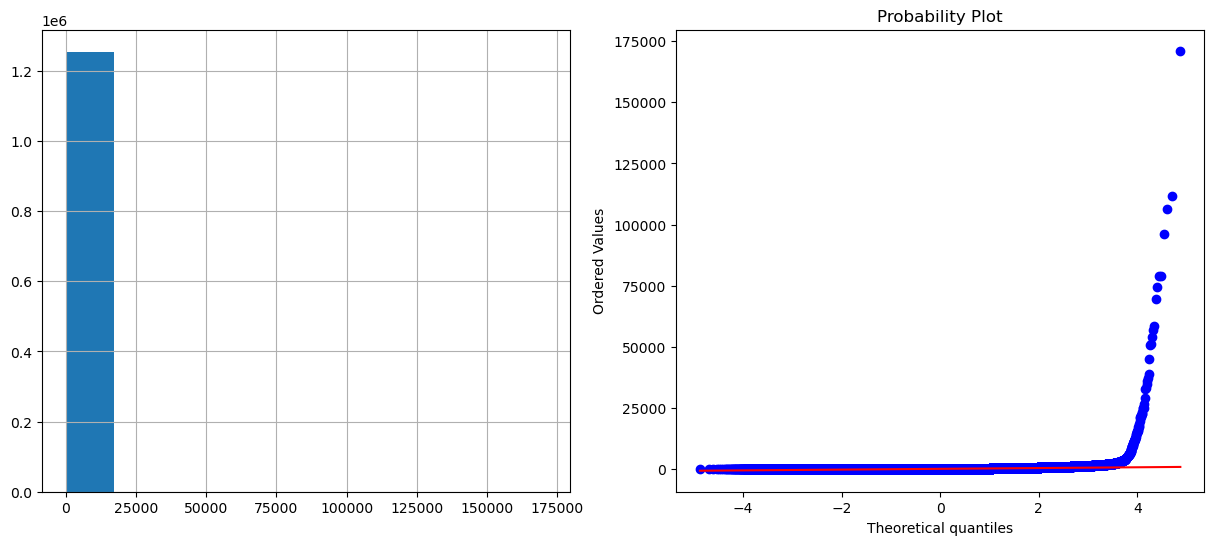

Bene_Avg_Age


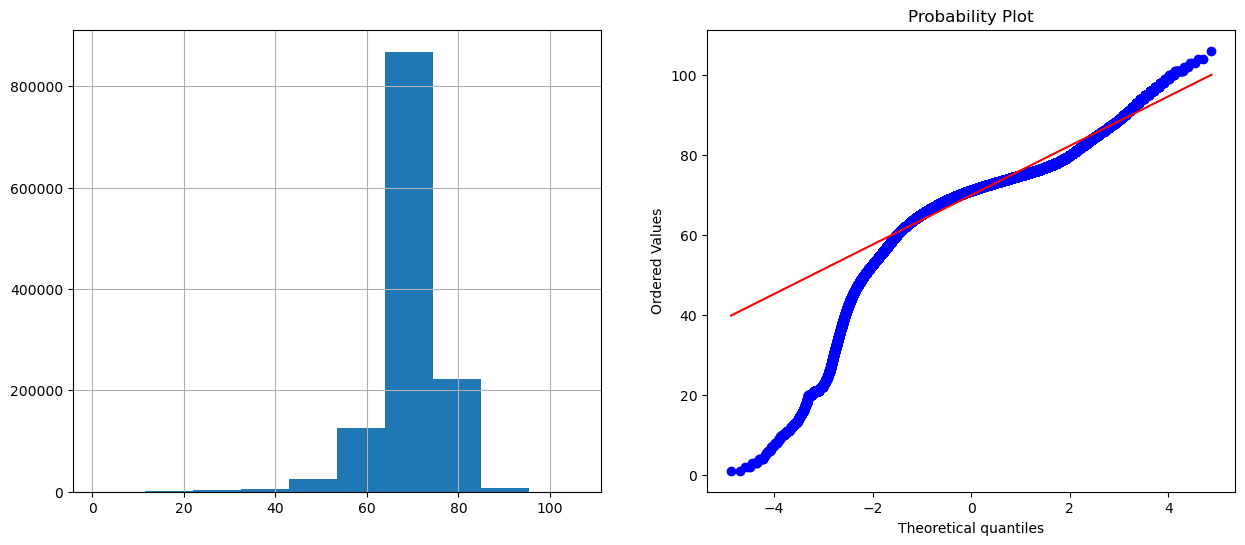

Bene_Dual_Cnt


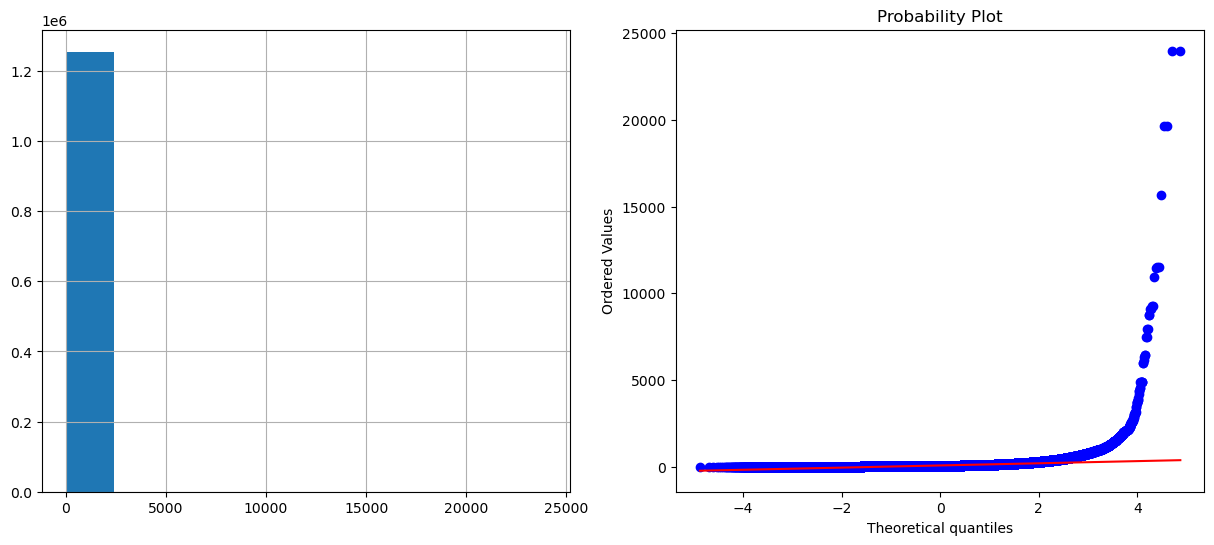

Bene_Ndual_Cnt


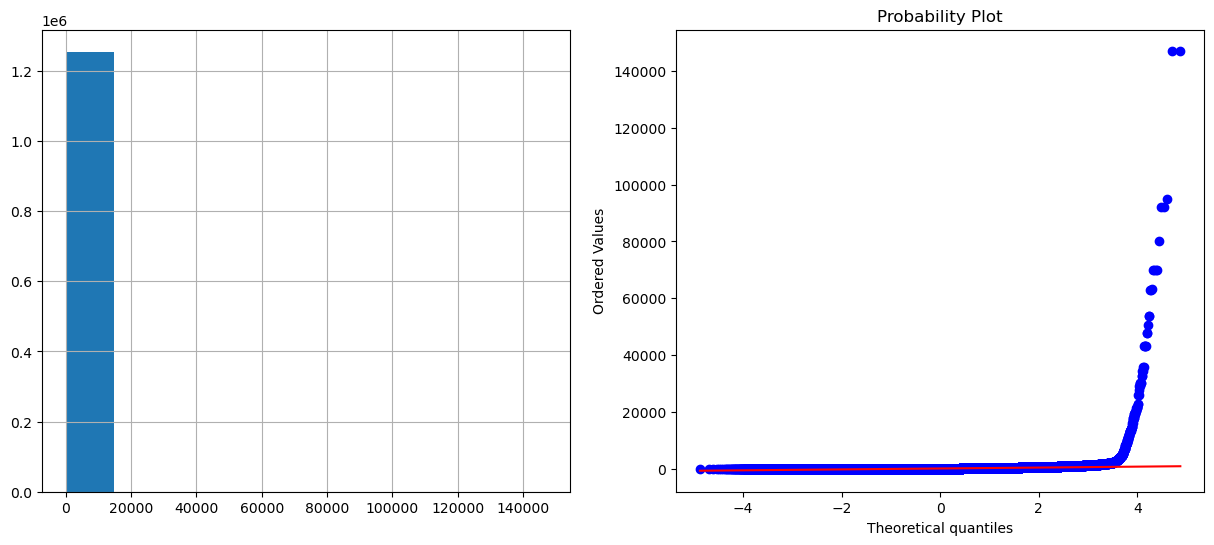

In [62]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

In [63]:
#scatter_matrix (df, alpha=0.8, figsize=(9,9)) 
#plt.show()

In [64]:
df


,Prscrbr_Gndr,Prscrbr_Ent_Cd,Prscrbr_RUCA,Prscrbr_Type,Prscrbr_Type_src,Tot_Clms,Tot_30day_Fills,Tot_Drug_Cst,Tot_Day_Suply,Tot_Benes,Bene_Avg_Age,Bene_Dual_Cnt,Bene_Ndual_Cnt
0,M,I,1.0,Internal Medicine,S,324,369.800000,20606.08,8621,106.0,73.160377,28.0,78.0
1,M,I,1.0,Anesthesiology,S,1992,2145.666667,79803.65,60953,228.0,64.315789,125.0,103.0
2,M,I,2.0,Dentist,S,57,57.700000,327.34,554,43.0,73.139535,0.0,43.0
3,F,I,1.0,Dentist,S,18,18.000000,128.52,181,82.0,71.142857,105.0,197.0
4,F,I,1.0,Nurse Practitioner,S,37,47.000000,3834.98,1366,82.0,67.333333,15.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255170,F,I,1.0,Optometry,S,40,80.666667,9870.01,2357,17.0,77.235294,17.0,30.0
1255171,M,I,1.0,Dentist,S,72,73.200000,397.84,1092,27.0,73.703704,12.0,208.0
1255172,M,I,2.0,Nurse Practitioner,S,47,90.466667,13618.96,2704,21.0,64.190476,42.0,185.0
1255173,M,I,1.0,Otolaryngology,S,249,291.066667,10899.52,5801,126.0,72.507937,18.0,108.0


In [65]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform Prscrbr_Gndr
df['Prscrbr_Gndr'] = le.fit_transform(df['Prscrbr_Gndr'])

# Fit and transform Prscrbr_Ent_Cd
df['Prscrbr_Ent_Cd'] = le.fit_transform(df['Prscrbr_Ent_Cd'])
# Fit and transform Prscrbr_Ent_Cd
df['Prscrbr_Type_src'] = le.fit_transform(df['Prscrbr_Type_src'])

df['Prscrbr_Type'] = le.fit_transform(df['Prscrbr_Type'])

C:\Users\Dedu\AppData\Local\Temp\ipykernel_16088\1608903914.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prscrbr_Gndr'] = le.fit_transform(df['Prscrbr_Gndr'])
C:\Users\Dedu\AppData\Local\Temp\ipykernel_16088\1608903914.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prscrbr_Ent_Cd'] = le.fit_transform(df['Prscrbr_Ent_Cd'])
C:\Users\Dedu\AppData\Local\Temp\ipykernel_16088\1608903914.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [66]:
df

,Prscrbr_Gndr,Prscrbr_Ent_Cd,Prscrbr_RUCA,Prscrbr_Type,Prscrbr_Type_src,Tot_Clms,Tot_30day_Fills,Tot_Drug_Cst,Tot_Day_Suply,Tot_Benes,Bene_Avg_Age,Bene_Dual_Cnt,Bene_Ndual_Cnt
0,1,0,1.0,87,0,324,369.800000,20606.08,8621,106.0,73.160377,28.0,78.0
1,1,0,1.0,9,0,1992,2145.666667,79803.65,60953,228.0,64.315789,125.0,103.0
2,1,0,2.0,43,0,57,57.700000,327.34,554,43.0,73.139535,0.0,43.0
3,0,0,1.0,43,0,18,18.000000,128.52,181,82.0,71.142857,105.0,197.0
4,0,0,1.0,121,0,37,47.000000,3834.98,1366,82.0,67.333333,15.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255170,0,0,1.0,129,0,40,80.666667,9870.01,2357,17.0,77.235294,17.0,30.0
1255171,1,0,1.0,43,0,72,73.200000,397.84,1092,27.0,73.703704,12.0,208.0
1255172,1,0,2.0,121,0,47,90.466667,13618.96,2704,21.0,64.190476,42.0,185.0
1255173,1,0,1.0,138,0,249,291.066667,10899.52,5801,126.0,72.507937,18.0,108.0


In [67]:
from sklearn.model_selection import train_test_split

# Select the features and the target variable
#features = ['Prscrbr_Gndr', 'Prscrbr_Ent_Cd','Prscrbr_RUCA','Prscrbr_Type', 'Prscrbr_Type_src', 'Tot_30day_Fills', 'Tot_Drug_Cst', 'Tot_Day_Suply', 'Tot_Benes','Bene_Avg_Age','Bene_Dual_Cnt','Bene_Ndual_Cnt']
features = ['Prscrbr_Gndr','Tot_30day_Fills','Tot_Drug_Cst','Tot_Day_Suply',]
target = 'Tot_Clms'

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)


In [68]:
r2score=[]
mse_values=[] 
rmse_values=[]
mae_values=[]

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Create and fit Logistic Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test)

# Compute the R-squared score
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2score.append(r2)
mse_values.append(mse)
rmse_values.append(rmse)
mae_values.append(mae)
# Print the results
print("R-squared score: {}".format(r2))
print("Mean squared error: {}".format(mse))
print("Root mean squared error: {}".format(rmse))
print("Mean absolute error: {}".format(mae))

R-squared score: 0.951539223112444
Mean squared error: 398699.8022412015
Root mean squared error: 631.4267987987218
Mean absolute error: 200.17522389401284


Text(0, 0.5, 'y_test')

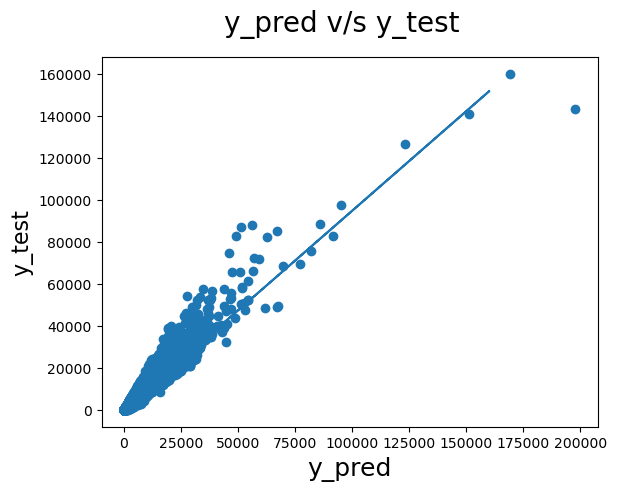

In [70]:
y_pred = lr_model.predict(X_test)
fig = plt.figure()
plt.scatter(y_pred,y_test)
a, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, a*y_test+b) 
fig.suptitle('y_pred v/s y_test', fontsize=20)             
plt.xlabel('y_pred', fontsize=18)                        
plt.ylabel('y_test', fontsize=16)

C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


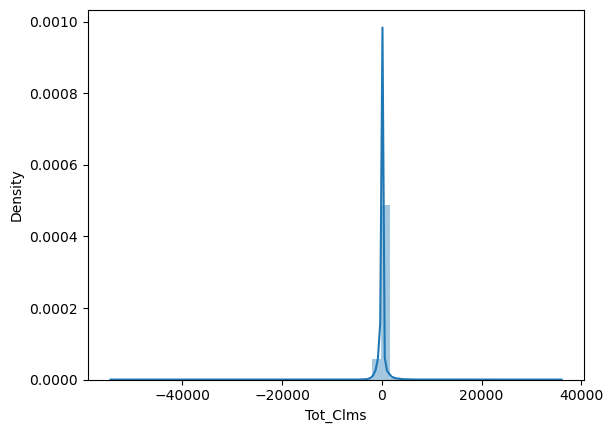

In [71]:
sns.distplot((y_test-y_pred),bins=50);

In [72]:
from sklearn.linear_model import Lasso

# Create a Lasso object with a regularization parameter of 0.1
lasso_reg = Lasso(alpha=0.1)

# Fit the model to the training data
lasso_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso_reg.predict(X_test)

# Calculate the R-squared score on the test data
r2_score = lasso_reg.score(X_test, y_test)

# Calculate the mean squared error on the test data
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error on the test data
rmse = np.sqrt(mse)

# Calculate the mean absolute error on the test data
mae = mean_absolute_error(y_test, y_pred)
r2score.append(r2)
mse_values.append(mse)
rmse_values.append(rmse)
mae_values.append(mae)
print("R-squared (R2) score:", r2_score)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


R-squared (R2) score: 0.951539313555666
Mean Squared Error (MSE): 398699.05814056884
Root Mean Squared Error (RMSE): 631.4262095768347
Mean Absolute Error (MAE): 200.1811036399288


C:\Users\Dedu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.121e+11, tolerance: 8.304e+08
  model = cd_fast.enet_coordinate_descent(


Text(0, 0.5, 'y_test')

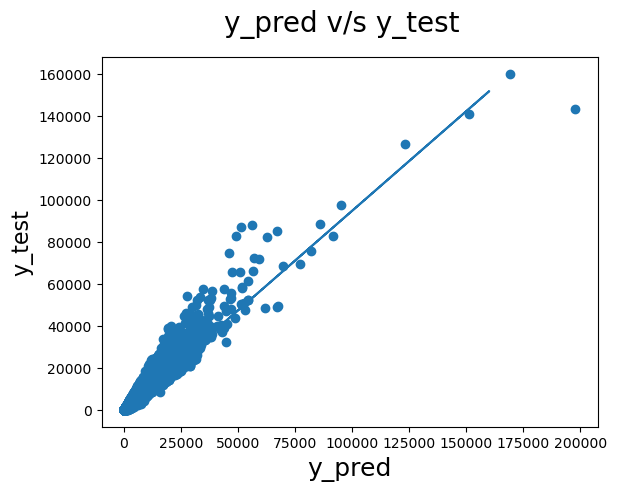

In [73]:
y_pred = lasso_reg.predict(X_test)
fig = plt.figure()
plt.scatter(y_pred,y_test)
a, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, a*y_test+b) 
fig.suptitle('y_pred v/s y_test', fontsize=20)             
plt.xlabel('y_pred', fontsize=18)                        
plt.ylabel('y_test', fontsize=16)

C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


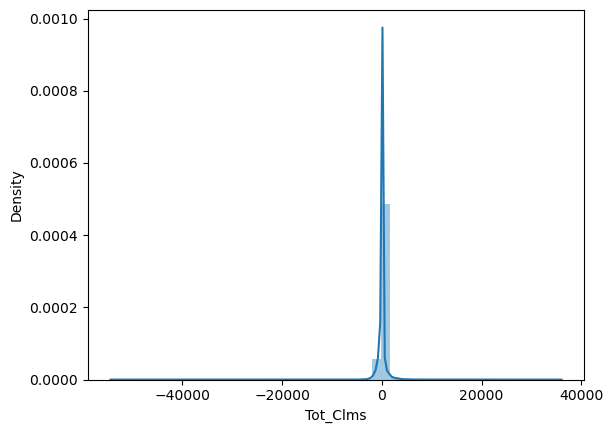

In [74]:
sns.distplot((y_test-y_pred),bins=50);

In [75]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# create the Ridge regression model
model = Ridge(alpha=0.5)

# fit the model on the training data
model.fit(X_train, y_train)

# make predictions on the test data
y_pred = model.predict(X_test)

# calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2score.append(r2)
mse_values.append(mse)
rmse_values.append(rmse)
mae_values.append(mae)
# print the evaluation metrics
print("R-squared (R2) score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


R-squared (R2) score: 0.9515392231127159
Mean Squared Error (MSE): 398699.8022389645
Root Mean Squared Error (RMSE): 631.4267987969504
Mean Absolute Error (MAE): 200.1752239104568


Text(0, 0.5, 'y_test')

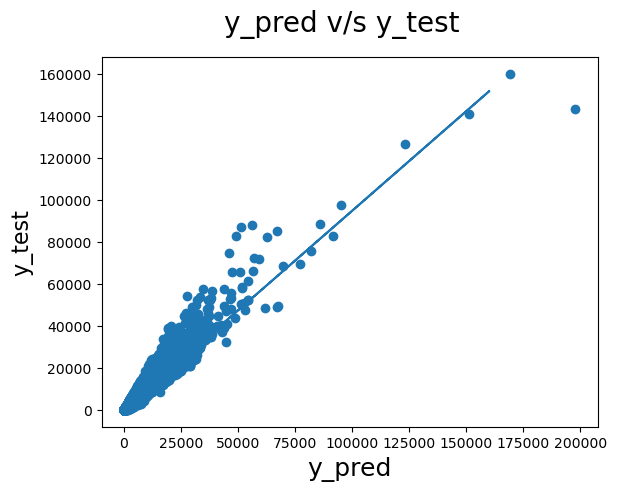

In [76]:
y_pred = model.predict(X_test)
fig = plt.figure()
plt.scatter(y_pred,y_test)
a, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, a*y_test+b) 
fig.suptitle('y_pred v/s y_test', fontsize=20)             
plt.xlabel('y_pred', fontsize=18)                        
plt.ylabel('y_test', fontsize=16)

C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


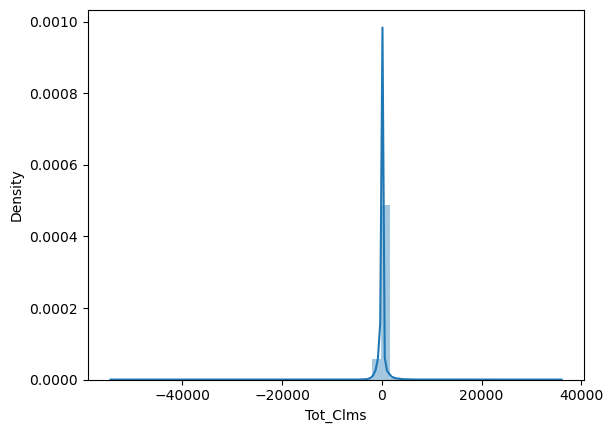

In [77]:
sns.distplot((y_test-y_pred),bins=50);

In [78]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Create KNN regressor object
knn = KNeighborsRegressor(n_neighbors=5)

# Train the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2score.append(r2)
mse_values.append(mse)
rmse_values.append(rmse)
mae_values.append(mae)
# print the evaluation metrics
print("R-squared (R2) score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


R-squared (R2) score: 0.8781410482384687
Mean Squared Error (MSE): 1002566.262637003
Root Mean Squared Error (RMSE): 1001.2823091601105
Mean Absolute Error (MAE): 246.56262991216363


Text(0, 0.5, 'y_test')

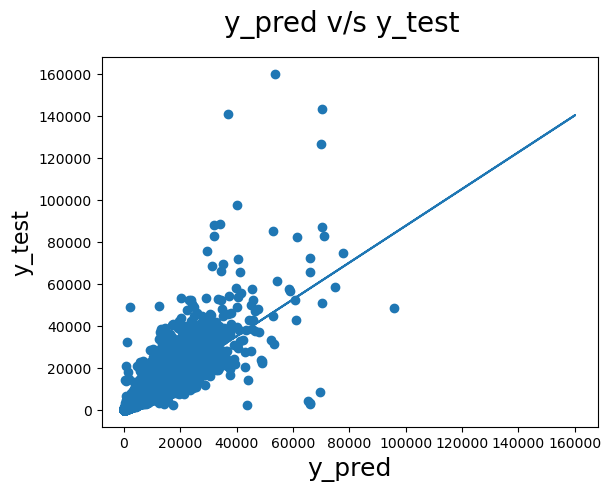

In [79]:
y_pred = knn.predict(X_test)
fig = plt.figure()
plt.scatter(y_pred,y_test)
a, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, a*y_test+b) 
fig.suptitle('y_pred v/s y_test', fontsize=20)             
plt.xlabel('y_pred', fontsize=18)                        
plt.ylabel('y_test', fontsize=16)

C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


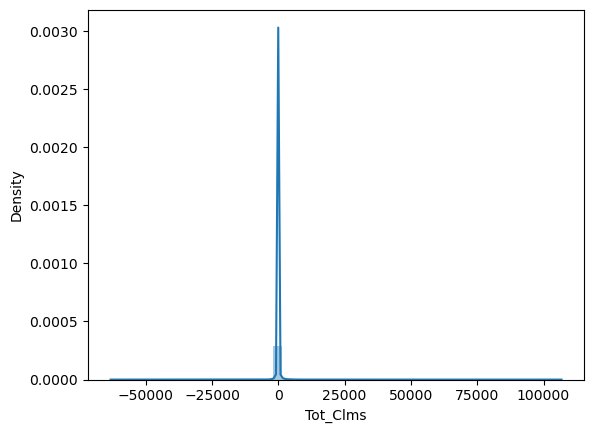

In [80]:
sns.distplot((y_test-y_pred),bins=50);

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Create and train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on test data
y_pred = rf.predict(X_test)

# Evaluate the model performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2score.append(r2)
mse_values.append(mse)
rmse_values.append(rmse)
mae_values.append(mae)
print("R-squared (R2) score: {}".format(r2))
print("Mean Squared Error (MSE):{}".format(mse))
print("Root Mean Squared Error (RMSE):{}".format(rmse))
print("Mean Absolute Error (MAE): {}".format(mae))


R-squared (R2) score: 0.9682320351800857
Mean Squared Error (MSE):261363.56255067926
Root Mean Squared Error (RMSE):511.23728595504383
Mean Absolute Error (MAE): 151.66379368732498


Text(0, 0.5, 'y_test')

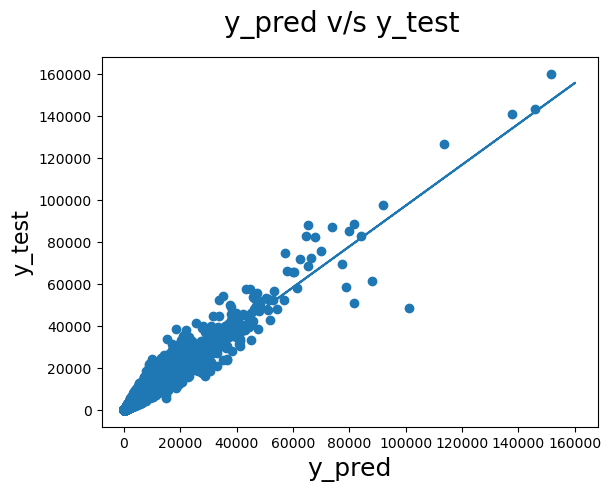

In [82]:
y_pred = rf.predict(X_test)
fig = plt.figure()
plt.scatter(y_pred,y_test)
a, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, a*y_test+b) 
fig.suptitle('y_pred v/s y_test', fontsize=20)             
plt.xlabel('y_pred', fontsize=18)                        
plt.ylabel('y_test', fontsize=16)

C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


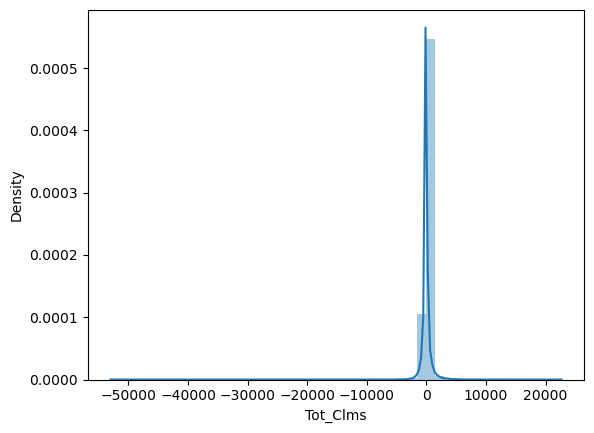

In [83]:
sns.distplot((y_test-y_pred),bins=50);

In [84]:
# Using GradientBoostingRegressor Model
from sklearn.ensemble import GradientBoostingRegressor
reg=GradientBoostingRegressor() 
reg.fit(X_test , y_test)
# Make predictions on test data
y_pred = reg.predict(X_test)

# Evaluate the model performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2score.append(r2)
mse_values.append(mse)
rmse_values.append(rmse)
mae_values.append(mae)
print("R-squared (R2) score: {}".format(r2))
print("Mean Squared Error (MSE):{}".format(mse))
print("Root Mean Squared Error (RMSE):{}".format(rmse))
print("Mean Absolute Error (MAE): {}".format(mae))


R-squared (R2) score: 0.9599588243243852
Mean Squared Error (MSE):329429.4860442541
Root Mean Squared Error (RMSE):573.9594811868292
Mean Absolute Error (MAE): 205.26891658157783


Text(0, 0.5, 'y_test')

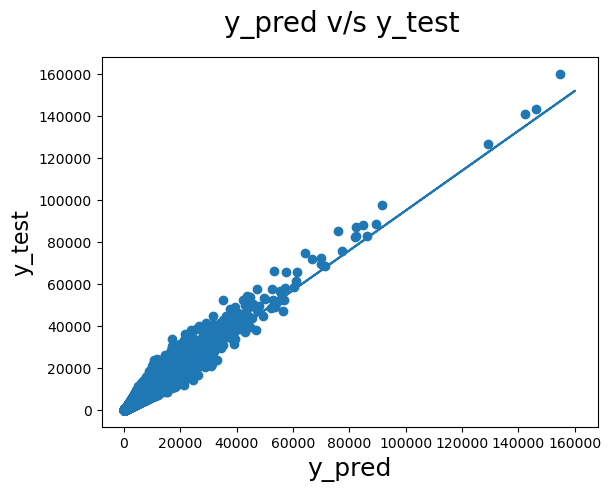

In [85]:
y_pred = reg.predict(X_test)
fig = plt.figure()
plt.scatter(y_pred,y_test)
a, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, a*y_test+b) 
fig.suptitle('y_pred v/s y_test', fontsize=20)             
plt.xlabel('y_pred', fontsize=18)                        
plt.ylabel('y_test', fontsize=16)

C:\Users\Dedu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


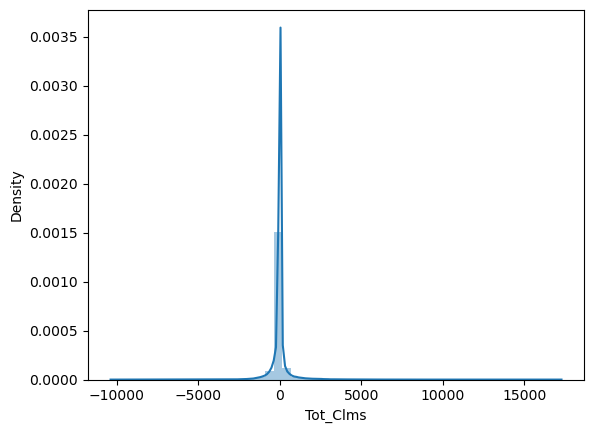

In [86]:
sns.distplot((y_test-y_pred),bins=50);

C:\Users\Dedu\AppData\Local\Temp\ipykernel_16088\3428877768.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(models, rotation=90)


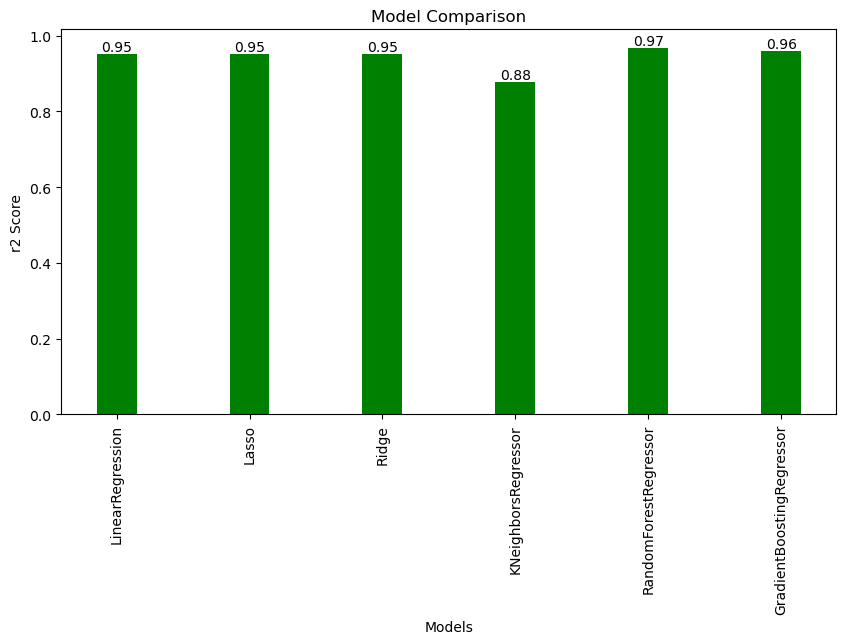

In [87]:
import matplotlib.pyplot as plt

models = ['LinearRegression', 'Lasso', 'Ridge', 'KNeighborsRegressor', 'RandomForestRegressor','GradientBoostingRegressor']


fig, ax = plt.subplots(figsize=(10,5))
rects = ax.bar(models, r2score, color='g', width=0.3)

ax.set_xlabel('Models')
ax.set_ylabel('r2 Score')
ax.set_title('Model Comparison')
ax.set_xticklabels(models, rotation=90)

for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()
